In [ ]:
from google.colab import drive
from os.path import join 

ROOT = "/content/gdrive/"
drive.mount(ROOT)

## 해당 파일에서 하는 것 : pClassToFileName.pickle, pFileNamesToClass.pickle, fileName.csv, cropped_printed.zip 생성 

## Exploratory Data Analysis 학습 데이터 파악

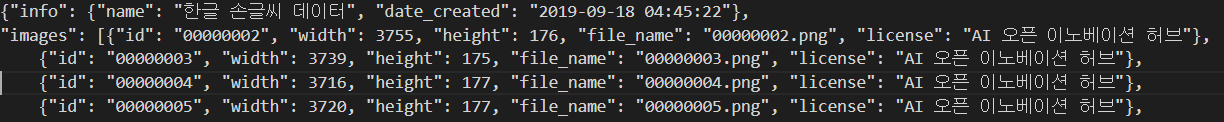

### 손글씨 데이터 파악

In [2]:
# 손글씨 데이터에서 필요한 것들 (for GAN) 
# text(클래스) : json_data['annotations'][idx]['text']
# 이미지 크기 : json_data['images'][idx]['width'] 또는 ['height']
# 파일명 : json_data['images'][idx]['file_name']
import json

In [3]:
def getListOfHandWritingFileNames(listOfFemaleHandWritingFileNames, listOfMaleHandWritingFileNames):
    handwritingMetaFile_location = '/content/gdrive/Shareddrives/machine_learning_in_practice/한국어 글자체 이미지/01.손글씨/handwriting_data_info1.json'

    with open(handwritingMetaFile_location, 'r') as f:
        hw_json_data = json.load(f)

    hw_ClassToFileNames, hw_WordsToFileNames= {}, {}
    hw_FileNameToClass = {}
    hw_syllableDataLength = 0

    for idx, img_data in enumerate(hw_json_data['images']):
        # idx 번째 이미지 데이터들에 대해 {클래스 : [파일명, 파일명, ...]}
        class_ = hw_json_data['annotations'][idx]['text']
        fileName = hw_json_data['images'][idx]['file_name']
        if len(class_) == 1:    
            # 한 글자인 경우만 ClassToFileNames에 넣기
            if class_ not in hw_ClassToFileNames.keys(): # idx번째 이미지의 클래스가 새로운 클래스이면
                hw_ClassToFileNames[class_] = [] # 빈 리스트 생성
            hw_ClassToFileNames[class_].append(fileName)
            hw_syllableDataLength += 1
            if hw_json_data['annotations'][1]['attributes']['gender'] == '여':
                listOfFemaleHandWritingFileNames.append(fileName)
            else:
                listOfMaleHandWritingFileNames.append(fileName)
        else:
            # 단어, 문장의 경우 WordsToFileNames에 넣기
            if class_ not in hw_WordsToFileNames.keys(): # idx번째 이미지의 클래스가 새로운 클래스이면
                hw_WordsToFileNames[class_] = [] # 빈 리스트 생성
            hw_WordsToFileNames[class_].append(fileName)
    
    for idx, img_data in enumerate(hw_json_data['images']):
        fileName = hw_json_data['images'][idx]['file_name']
        class_ = hw_json_data['annotations'][idx]['text']
        hw_FIleNameToClass[fileName] = class_
    
    print("*** Handwriting Data Description ***")
    print("\t전체 데이터 수 : ", len(hw_json_data['images']) )# 여기에는 문장 데이터, 단어 데이터, 음절 데이터 모두 포함됨
    print("\t음절 클래스 수 : ", len(hw_ClassToFileNames) ) # 한국어 글자 종류는 11,172가지.
    print("\t단어/문장 클래스 수: ", len(hw_WordsToFileNames))
    print("\t음절 데이터 수 : ", hw_syllableDataLength)
    print("\t단어/문장 데이터 수 : ", len(hw_json_data['images']) - hw_syllableDataLength)
    print(f"\t한 음절 당 평균 {hw_syllableDataLength/len(hw_ClassToFileNames)} 개 손글씨 데이터 존재함")

    return hw_ClassToFileNames, hw_FileNameToClass

### 인쇄체 데이터 파악

In [5]:
import json
def getListOfPrintedFileNames(listOfPrintedFileNames):
    printedMetaFile_location = '/content/gdrive/Shareddrives/machine_learning_in_practice/한국어 글자체 이미지/02.인쇄체/printed_data_info.json'

    with open(printedMetaFile_location, 'r') as f:
        p_json_data = json.load(f)

    p_ClassToFileNames, p_WordsToFileNames= {}, {}
    p_FIleNameToClass = {} # 파일명 : json_data['images'][idx]['file_name']
    p_syllableDataLength = 0

    for idx, img_data in enumerate(p_json_data['images']):
        # idx 번째 이미지 데이터들에 대해 {클래스 : [파일명, 파일명, ...]}
        class_ = p_json_data['annotations'][idx]['text']
        fileName = p_json_data['images'][idx]['file_name']
        if len(class_) == 1:    
            # 한 글자인 경우만 ClassToFileNames에 넣기
            if class_ not in p_ClassToFileNames.keys(): # idx번째 이미지의 클래스가 새로운 클래스이면
                p_ClassToFileNames[class_] = [] # 빈 리스트 생성
            p_ClassToFileNames[class_].append(fileName)
            p_syllableDataLength += 1
            listOfPrintedFileNames.append(fileName)

        else:
            # 단어, 문장의 경우 WordsToFileNames에 넣기
            if class_ not in p_WordsToFileNames.keys(): # idx번째 이미지의 클래스가 새로운 클래스이면
                p_WordsToFileNames[class_] = [] # 빈 리스트 생성
            p_WordsToFileNames[class_].append(fileName)
    for idx, img_data in enumerate(p_json_data['images']):
        fileName = p_json_data['images'][idx]['file_name']
        class_ = p_json_data['annotations'][idx]['text']
        p_FIleNameToClass[fileName] = class_

    print("*** Printed Data Description ***")
    print("\t전체 데이터 수 : ", len(p_json_data['images']) )# 여기에는 문장 데이터, 단어 데이터, 음절 데이터 모두 포함됨
    print("\t음절 클래스 수 : ", len(p_ClassToFileNames) ) # 한국어 글자 종류는 11,172가지.
    print("\t단어/문장 클래스 수: ", len(p_WordsToFileNames))
    print("\t음절 데이터 수 : ", p_syllableDataLength)
    print("\t단어/문장 데이터 수 : ", len(p_json_data['images']) - p_syllableDataLength)
    print(f"\t한 음절 당 평균 {p_syllableDataLength/len(p_ClassToFileNames)} 개 손글씨 데이터 존재함")

    return p_ClassToFileNames, p_FIleNameToClass

## 인쇄체 데이터 파싱

In [6]:
# 인쇄체 음절 이미지의 파일명  for pretrain
listOfPrintedFileNames = []
# 여성 필기체 음절 이미지의 파일명  for pretrain
listOfFemaleHandWritingFileNames = []
# 남성 필기체 음절 이미지의 파일명  for train
listOfMaleHandWritingFileNames = []

# getListOfHandWritingFileNames(listOfFemaleHandWritingFileNames, listOfMaleHandWritingFileNames)
p_ClassToFileNames, p_FIleNameToClass = getListOfPrintedFileNames(listOfPrintedFileNames)

#print("여성 필기체 data 수 : ", len(listOfFemaleHandWritingFileNames))
#print("남성 필기체 data 수 : ", len(listOfMaleHandWritingFileNames))
print("인쇄체 data 수 : ", len(listOfPrintedFileNames))

*** Printed Data Description ***
	전체 데이터 수 :  878100
	음절 클래스 수 :  11172
	단어/문장 클래스 수:  6054
	음절 데이터 수 :  575350
	단어/문장 데이터 수 :  302750
	한 음절 당 평균 51.499283924095955 개 손글씨 데이터 존재함
인쇄체 data 수 :  575350


#### claassToFileName.pickle ( 자주 사용하는 한국어 + 어려운거 몇 개만 class로) 

In [7]:
import pandas as pd

classFile = '/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital/GAN/data/한국어 학습용 어휘 목록.xls'
df = pd.read_excel(classFile)

df.head()

,순위,단어,품사,풀이,등급
0,1195.0,가게,명,NaN,A
1,898.0,가격03,명,價格,B
2,2986.0,가구03,명,家口,C
3,7434.0,가구04,명,家具,B
4,4964.0,가까워지다,동,NaN,B


In [8]:
word_list = df["단어"].tolist()
# word_list 수정,  '가구04', '도쿄(동경)' 가공
for idx, word in enumerate(word_list):
    if len(word) > 2:
        if word[-2] in ('0', '1', '2', '3'):
            word_list[idx] = word[:-2]
    if word[-1] == ')':
        del word_list[idx]
        
len(word_list)

5963

In [9]:
syllable_set = set()
for word in word_list:
    for syllable in word:
        syllable_set.add(syllable)
len(syllable_set)

dump_set = {'0', '1', '8'}

easy_syllable_set = syllable_set - dump_set
len(easy_syllable_set)

971

In [10]:
whole_syllable_set = set(p_ClassToFileNames.keys())
len(whole_syllable_set)

11172

In [11]:
difficult_syllable_set = whole_syllable_set - easy_syllable_set
len(difficult_syllable_set)

10201

In [13]:
import random

difficult_syllable_list = list(difficult_syllable_set)
classList = []

randIdx = random.randint(0, len(difficult_syllable_set))

difficult_syllable_choice = set()

for i in range(976):
    randIdx = random.randint(0, len(difficult_syllable_set))
    difficult_syllable_choice.add(randIdx)
len(difficult_syllable_choice)

idxs = list(difficult_syllable_choice)


difficult_syllable_classes = set()
for idx in idxs:
    difficult_syllable_classes.add(difficult_syllable_list[idx])
len(difficult_syllable_classes)

932

In [16]:
syllableClass = list(difficult_syllable_classes | easy_syllable_set)

import csv # csv파일로 적기 # newline 설정을 안하면 한줄마다 공백있는 줄이 생긴다. 
with open('/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital/GAN/data/classes.csv', 'w', newline='') as f: 
    writer = csv.writer(f) 
    writer.writerow(syllableClass) 

In [18]:
newClassToFileNames = {}
for syllable in difficult_syllable_classes:
    newClassToFileNames[syllable] = p_ClassToFileNames[syllable]

for syllable in easy_syllable_set:
    newClassToFileNames[syllable] = p_ClassToFileNames[syllable]

print("잘 쓰는 글자(971) : ", easy_syllable_set) # 국립국어연구원에서 2003년 5월에 발표한 한국어 학습용 어휘 목록에서 따옴
print("잘 안쓴느 글자(932) : ", difficult_syllable_classes) # 위의 꺼의 여집합 중 일부 ( 비율 거의 동일하게 함)
print("잘 쓰는 글자(971)와 잘 안쓰는 글자(932) 총 클래스 : ", len(newClassToFileNames))

잘 쓰는 글자(971) :  {'잊', '떼', '즉', '곧', '함', '얼', '불', '엊', '답', '큼', '늙', '츠', '템', '캐', '굵', '롯', '듭', '빡', '낫', '잘', '란', '겨', '터', '촌', '퀴', '막', '냉', '경', '와', '흔', '혹', '문', '간', '뻗', '되', '록', '빵', '후', '교', '비', '뜩', '촛', '령', '짓', '잦', '휴', '차', '덕', '촉', '값', '압', '둘', '찻', '껴', '측', '처', '춤', '토', '실', '긴', '면', '껌', '신', '딸', '뚜', '슨', '더', '깥', '뿌', '섹', '냄', '옳', '련', '찮', '깔', '입', '떻', '액', '콩', '흑', '뭐', '객', '획', '악', '늑', '폰', '칫', '버', '파', '테', '모', '법', '겁', '왕', '곰', '평', '산', '묻', '돗', '넉', '않', '설', '꾸', '욕', '옥', '괜', '꾼', '운', '계', '켜', '밟', '없', '씨', '깍', '완', '빗', '엘', '깅', '삭', '증', '런', '껍', '몇', '회', '여', '곡', '새', '벨', '침', '골', '자', '뚱', '족', '끗', '량', '먼', '떤', '빔', '찍', '묶', '총', '팩', '푹', '징', '얻', '퇴', '픽', '싫', '진', '엿', '틀', '겉', '짝', '뜯', '월', '엔', '공', '쁘', '탄', '홉', '뭘', '붕', '벽', '해', '독', '별', '시', '듯', '훈', '놔', '뇌', '린', '유', '쿠', '급', '속', '고', '분', '낚', '초', '이', '견', '격', '퍽', '곤', '핑', '톱', '세', '판', '순', '줌', '같', '멈', '례', '균', '엎', '매'

In [ ]:
with open('/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital/GAN/data/pClassToFileNames.pickle', 'wb') as fw:
    pickle.dump(newClassToFileNames, fw)

#### FileNameToClass.pickle - key를 한정 (기존 FileNameToClass는 11172개의 class 모두 담고 있음 => 1903개 클래스로 축소)

In [19]:
classes = newClassToFileNames.keys()
new_pFileNameToClass = dict()
for fileName in p_FIleNameToClass.keys():
    if p_FIleNameToClass[fileName] not in classes:
        continue
    new_pFileNameToClass[fileName] = p_FIleNameToClass[fileName]

print("클래스 축소 전 데이터 수 : ", len(p_FIleNameToClass))
print("클래스 축소 후 데이터 수 : ", len(new_pFileNameToClass)) # 줄여도 엄청 많네...

클래스 축소 전 데이터 수 :  878100
클래스 축소 후 데이터 수 :  111900


In [25]:
# import numpy as np
# new_pFileNameToClass.keys()
# class_list = []
# for key in new_pFileNameToClass:
#     class_ = new_pFileNameToClass[key]
#     class_list.append(class_)
# print(len(new_pFileNameToClass))
# np.array(class_list)
# unique = np.unique(class_list)
# for class_ in unique:
#     print(class_)

In [ ]:
# import pickle
# with open('/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital/GAN/data/pFileNameToClass.pickle','wb') as fw:
#     pickle.dump(new_pFileNameToClass, fw)

#### 이미지 담긴 폴더에서 1903개 클래스에 해당하는 이미지 파일명만 저장하기 for dataLoader

In [20]:
import os

path = '/content/syllable'
file_list = os.listdir(path)

# new_pFileNameToClass 는 1903개 클래스에 해당하는 image filename 들만 key 로 있음
newFileList = []
newClassList = []
for filename in file_list:
    try: # new_pFileNameToClass 이용함 key 에러 뜨면 넘겨야 함
        class_ = new_pFileNameToClass[filename]
        newFileList.append(filename)
        newClassList.append(class_)
    except KeyError:
        # print(filename)
        pass
print(len(newFileList))
print(len(newClassList))

90680
90680


In [ ]:
len(new_pFileNameToClass) # 112300

112300

In [22]:
import os
import zipfile

new_zips= zipfile.ZipFile('data/raw_printed.zip', 'w') # 
 
for folder, subfolders, files in os.walk('/content/syllable'): 
    for file in files:
        try:
            new_pFileNameToClass[file] # 1921 클래스에 속하는 데이터만 zip함  총 112300개
            new_zips.write(os.path.join(folder, file), os.path.relpath(os.path.join(folder,file), 'data/'), compress_type = zipfile.ZIP_DEFLATED)
        except KeyError:
            pass

new_zips.close()

In [ ]:
# import csv

# filepath = '/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital/GAN/data/fileName.csv'
# with open(filepath, 'w', newline='') as f: 
#     writer = csv.writer(f) 
#     writer.writerow(newFileList)

In [23]:
!pwd

/content


## croppedImg 생성

In [24]:
!unzip '/content/data/raw_printed.zip' -d .

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: ./syllable/00285136.png  
  inflating: ./syllable/00497117.png  
  inflating: ./syllable/00058119.png  
  inflating: ./syllable/00208575.png  
  inflating: ./syllable/00362563.png  
  inflating: ./syllable/00443041.png  
  inflating: ./syllable/00436648.png  
  inflating: ./syllable/00224025.png  
  inflating: ./syllable/00163987.png  
  inflating: ./syllable/00107016.png  
  inflating: ./syllable/00355846.png  
  inflating: ./syllable/00283874.png  
  inflating: ./syllable/00521869.png  
  inflating: ./syllable/00478168.png  
  inflating: ./syllable/00249451.png  
  inflating: ./syllable/00474447.png  
  inflating: ./syllable/00227794.png  
  inflating: ./syllable/00192291.png  
  inflating: ./syllable/00467912.png  
  inflating: ./syllable/00269711.png  
  inflating: ./syllable/00385489.png  
  inflating: ./syllable/00182038.png  
  inflating: ./syllable/00236182.png  
  inflating: ./syllable/00480343.png  
  inflating: ./syllable/0011

In [ ]:
import cv2
import csv
import os
import numpy as np
from PIL import Image, ImageOps
import matplotlib.image as img 

# fileNamepath = '/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital/GAN/data/fileName.csv'
# with open(fileNamepath, 'r', encoding='utf-8') as f: 
#     rdr = csv.reader(f)
#     for list_ in rdr:
#         file_list_ = list_
# path = '/content/syllable'

...

savePath = '/content/data/cropped_printed'

for filename in file_list_:
    filePath = path + '/' + filename
    image=Image.open(filePath)
    image.load()
    imageSize = image.size
    
    # remove alpha channel
    invert_im = image.convert("RGB") 
    
    # invert image (so that white is 0)
    invert_im = ImageOps.invert(invert_im)
    imageBox = invert_im.getbbox()
    
    cropped=image.crop(imageBox)
    print(filePath, "Size:", imageSize, "New Size:", imageBox)
    cropped.save(savePath + '/' + filename)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/content/syllable/00149858.png Size: (100, 111) New Size: (14, 11, 87, 105)
/content/syllable/00149861.png Size: (105, 113) New Size: (12, 14, 87, 108)
/content/syllable/00149970.png Size: (110, 101) New Size: (13, 9, 96, 96)
/content/syllable/00149979.png Size: (102, 105) New Size: (9, 8, 93, 100)
/content/syllable/00150012.png Size: (110, 102) New Size: (11, 11, 101, 97)
/content/syllable/00150066.png Size: (102, 134) New Size: (12, 38, 86, 129)
/content/syllable/00150131.png Size: (91, 124) New Size: (7, 39, 81, 119)
/content/syllable/00150143.png Size: (104, 120) New Size: (9, 19, 88, 115)
/content/syllable/00150166.png Size: (110, 96) New Size: (10, 15, 95, 91)
/content/syllable/00150214.png Size: (91, 115) New Size: (9, 41, 80, 100)
/content/syllable/00150216.png Size: (102, 133) New Size: (14, 38, 87, 128)
/content/syllable/00150232.png Size: (108, 102) New Size: (14, 10, 94, 97)
/content/syllable/00150267.png Size: (102, 123) New Size: (7, 25

In [ ]:
import os
import zipfile

new_zips= zipfile.ZipFile('data/cropped_printed.zip', 'w')
 
for folder, subfolders, files in os.walk('/content/data/cropped_printed/'): 
    for file in files:
        new_zips.write(os.path.join(folder, file), os.path.relpath(os.path.join(folder,file), 'data/temp/'), compress_type = zipfile.ZIP_DEFLATED)

new_zips.close()

In [ ]:
import shutil

savePath = '/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital/GAN/data'

shutil.move('data/cropped_printed.zip', savePath)

'/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital/GAN/data/cropped_printed.zip'

## github 커밋

In [ ]:
MY_GOOGLE_DRIVE_PATH = "/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital"
%cd "{MY_GOOGLE_DRIVE_PATH}"

/content/gdrive/Shareddrives/machine_learning_in_practice/Analog-PILGI-to-DIgital


In [ ]:
!git config --global user.email dkwjd0824@khu.ac.kr  # 이메일 입력 ex) qhrqufdlek@naver.com
!git config --global user.name  hyeneung #깃헙 아이디 입력 ex)luckydipper
!git pull

Already up to date.


In [ ]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   .gitignore
	modified:   GAN/Parsing.ipynb
	modified:   GAN/WGAN_DIV.ipynb
	modified:   "object_detection/github_util.ipynb\341\204\213\341\205\264 \341\204\211\341\205\241\341\204\207\341\205\251\341\206\253\341\204\213\341\205\264 \341\204\211\341\205\241\341\204\207\341\205\251\341\206\253"

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	GAN/outputs/
	object_detection/__pycache__/
	object_detection/config.py
	object_detection/ctpn_model.py
	object_detection/ctpn_utils.py
	object_detection/dataset.py
	object_detection/error_imgs.txt
	object_detection/test_data_generating_file/data_crawer.ipynb
	object_detection/test_data_generating_file/index.html?com=downloads
	object_detection/text_detector.ipynb

no change

In [ ]:
!git add GAN/Parsing.ipynb

In [ ]:
!git commit -m"[ADD] made cropped zip img"

[main c941a21] [ADD] made cropped zip img
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite GAN/Parsing.ipynb (90%)


In [ ]:
!git push

Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 114.92 KiB | 3.71 MiB/s, done.
Total 4 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/PILGI-Analog-To-Digital/Analog-PILGI-to-DIgital.git
   f01dea9..c941a21  main -> main
